# Centrality Correlation Analysis

This file is the centrality correlation analysis part of the project, submitted to Prof. Soong Moon Kang for MSIN0074 Network Analysis by SRN 22086573.

## Importing Libraries and Loading Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import contractions
import random
from collections import Counter
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
%store -r top_coins coin_keywords tweet_corpus hashtag_corpus df degree_centrality closeness_centrality betweenness_centrality

## Crypto Data Analysis

In [5]:
# Define the list of cryptocurrency names
coin_names = list(coin_keywords.keys())

# Define a dictionary to store the counts
coin_counts = {}

# Loop over each tweet in the corpus
for tweet in tweet_corpus:
    # Loop over each coin name
    for coin_name in coin_names:
        # Compile a regular expression pattern to match the coin name keywords
        pattern = re.compile(r'\b(?:{})\b'.format('|'.join(coin_keywords[coin_name])), flags=re.IGNORECASE)
        # Count the number of matches in the tweet
        count = len(re.findall(pattern, tweet))
        # Update the coin count in the dictionary
        coin_counts[coin_name] = coin_counts.get(coin_name, 0) + count

# Convert the dictionary to a Pandas dataframe
df_coin_counts = pd.DataFrame.from_dict(coin_counts, orient='index', columns=['Count'])

# Sort the dataframe in descending order by count
df_coin_counts = df_coin_counts.sort_values('Count', ascending=False)

# Print the frequency table
print(df_coin_counts.head())

           Count
Bitcoin     4981
Ethereum    4438
Immutable   3649
BNB         3644
Chainlink   2265


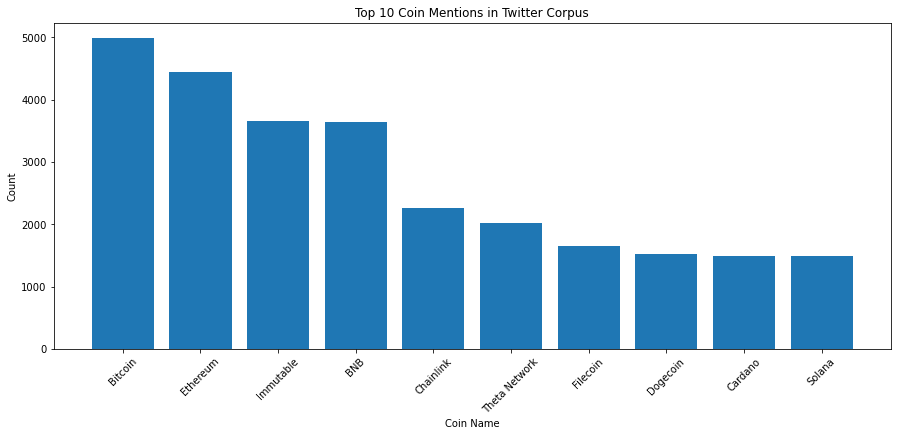

In [9]:
# Get the top 20 frequently mentioned coin names
df_top_coins = df_coin_counts.head(10)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Create a histogram of the top 20 coin counts
ax.bar(df_top_coins.index, df_top_coins['Count'])

# Set the title and axis labels
ax.set_title('Top 10 Coin Mentions in Twitter Corpus')
ax.set_xlabel('Coin Name')
ax.set_ylabel('Count')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the histogram
plt.show()

In [10]:
# Create a dataframe with the market cap rank data
top_coins_by_volume = top_coins
df_market_rank = pd.DataFrame({'Coin': top_coins_by_volume})
df_market_rank['Market Cap Rank'] = df_market_rank.index + 1

# Create a dataframe with the tweet count rank data
df_top_coins = df_coin_counts
df_top_coins = df_top_coins.reset_index()
df_top_coins['Tweet Count Rank'] = df_top_coins.index + 1
df_top_coins = df_top_coins.rename(columns={'index': 'Coin'})

# Merge the market cap rank dataframe with the tweet count dataframe using an outer join
df_combined = pd.merge(df_market_rank, df_top_coins, on='Coin', how='outer')
df_combined.fillna('Not in Top 20', inplace=True)
df_combined = pd.DataFrame(df_combined)

In [11]:
df_combined['Market Cap Rank'] = pd.to_numeric(df_combined['Market Cap Rank'], errors='coerce')
df_combined['Tweet Count Rank'] = pd.to_numeric(df_combined['Tweet Count Rank'], errors='coerce')

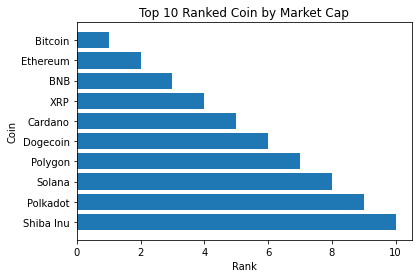

In [12]:
# Slice the first 10 rows of the DataFrame
df_top10 = df_combined.iloc[:,:2].head(10)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(df_top10['Coin'], df_top10['Market Cap Rank'])
ax.invert_yaxis()

# Set the chart title and axis labels
ax.set_title('Top 10 Ranked Coin by Market Cap')
ax.set_xlabel('Rank')
ax.set_ylabel('Coin')

# Show the chart
plt.show()

In [13]:
# Calculate the correlation coefficient between market cap and tweet count
corr_coef = df_combined['Market Cap Rank'].corr(df_combined['Tweet Count Rank'])

print("Correlation coefficient between market cap and tweet count:", corr_coef)

Correlation coefficient between market cap and tweet count: 0.4602750894172101


## Sentiment Analysis

In [14]:
# Load tweet corpus into a pandas dataframe
tweet_df = pd.DataFrame(tweet_corpus, columns=['text'])

# Load hashtag corpus into a pandas dataframe
hashtag_df = pd.DataFrame(hashtag_corpus, columns=['text'])

In [15]:
# Define coin names and related keywords
coin_names = list(df_combined["Coin"])

# Create an empty list to store filtered tweets
filtered_tweets = []

# Iterate through each tweet in the dataframe
for index, row in tweet_df.iterrows():
    tweet_text = row['text']
    
    # Use regular expressions to match the coin names in the tweet text
    for coin_name in coin_names:
        pattern = '|'.join(coin_keywords[coin_name])
        if re.search(pattern, tweet_text, re.IGNORECASE):
            # If tweet is related to the coin, add it to the list
            filtered_tweets.append((coin_name, tweet_text))

# Convert filtered tweets list to a pandas dataframe
filtered_tweets_df = pd.DataFrame(filtered_tweets, columns=['Coin', 'Tweet'])

In [16]:
# Create a dictionary of dataframes, where the keys are the cryptocurrency names and the values are the corresponding dataframes
crypto_dfs = {}
for crypto in coin_names:
    crypto_dfs[crypto] = filtered_tweets_df[filtered_tweets_df['Coin'] == crypto]
    globals()[crypto+'_df'] = crypto_dfs[crypto] #Bitcoin_df, Dogecoin_df, ... 

# Print the number of rows in each dataframe
for crypto, df in crypto_dfs.items():
    print(f'{crypto}: {len(df)} rows')

Bitcoin: 4364 rows
Ethereum: 6221 rows
BNB: 3537 rows
XRP: 730 rows
Cardano: 1851 rows
Dogecoin: 1603 rows
Polygon: 1608 rows
Solana: 2728 rows
Polkadot: 1285 rows
Shiba Inu: 1661 rows
TRON: 1248 rows
Litecoin: 1258 rows
Avalanche: 1342 rows
Dai: 1596 rows
Uniswap: 5058 rows
Wrapped Bitcoin: 49 rows
Chainlink: 2140 rows
Cosmos: 908 rows
UNUS SED LEO: 451 rows
Toncoin: 2975 rows
Ethereum Classic: 1183 rows
Monero: 741 rows
OKB: 418 rows
Bitcoin Cash: 747 rows
Stellar: 752 rows
Filecoin: 1462 rows
Aptos: 603 rows
TrueUSD: 728 rows
Lido DAO: 836 rows
Hedera: 835 rows
Cronos: 1811 rows
NEAR Protocol: 1285 rows
VeChain: 1025 rows
Algorand: 1054 rows
Quant: 691 rows
Internet Computer: 356 rows
ApeCoin: 307 rows
Stacks: 418 rows
The Graph: 251 rows
Fantom: 965 rows
EOS: 722 rows
BitDAO: 5398 rows
Decentraland: 1073 rows
Aave: 1012 rows
MultiversX: 538 rows
Tezos: 804 rows
Flow: 397 rows
Immutable: 3726 rows
Conflux: 1110 rows
Theta Network: 1045 rows
Axie Infinity: 310 rows
The Sandbox: 1111 

In [17]:
# Create an empty dictionary to store the sentiment dataframes
sentiment_dfs = {}

# Iterate through each cryptocurrency dataframe
for crypto, df in crypto_dfs.items():
    # Create a new column for sentiment polarity score
    df['SentimentPolarity'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    
    # Create a new column for sentiment subjectivity score
    df['SentimentSubjectivity'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
    
    # Calculate the average sentiment scores for each cryptocurrency
    avg_polarity = df['SentimentPolarity'].mean()
    avg_subjectivity = df['SentimentSubjectivity'].mean()
    
    # Create a new dataframe for the sentiment data
    sentiment_data = {'Coin': [crypto], 'AvgPolarity': [avg_polarity], 'AvgSubjectivity': [avg_subjectivity]}
    sentiment_df = pd.DataFrame(sentiment_data)
    
    # Add the sentiment dataframe to the dictionary
    sentiment_dfs[crypto] = sentiment_df

# Print the sentiment dataframes
for crypto, df in sentiment_dfs.items():
    print(f'{crypto}:\n{df}\n')

/Users/ijeonghyeon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/ijeonghyeon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Bitcoin:
      Coin  AvgPolarity  AvgSubjectivity
0  Bitcoin     0.142957         0.313623

Ethereum:
       Coin  AvgPolarity  AvgSubjectivity
0  Ethereum     0.105998         0.299685

BNB:
  Coin  AvgPolarity  AvgSubjectivity
0  BNB     0.141723         0.291715

XRP:
  Coin  AvgPolarity  AvgSubjectivity
0  XRP     0.137184         0.351614

Cardano:
      Coin  AvgPolarity  AvgSubjectivity
0  Cardano     0.133132         0.302985

Dogecoin:
       Coin  AvgPolarity  AvgSubjectivity
0  Dogecoin     0.130829         0.277667

Polygon:
      Coin  AvgPolarity  AvgSubjectivity
0  Polygon     0.129806         0.399784

Solana:
     Coin  AvgPolarity  AvgSubjectivity
0  Solana     0.103726         0.304333

Polkadot:
       Coin  AvgPolarity  AvgSubjectivity
0  Polkadot     0.082546         0.202792

Shiba Inu:
        Coin  AvgPolarity  AvgSubjectivity
0  Shiba Inu     0.097339         0.262021

TRON:
   Coin  AvgPolarity  AvgSubjectivity
0  TRON     0.185126         0.395226

Litecoin:

In [18]:
sentiment_df = pd.concat(sentiment_dfs.values(), ignore_index=True)

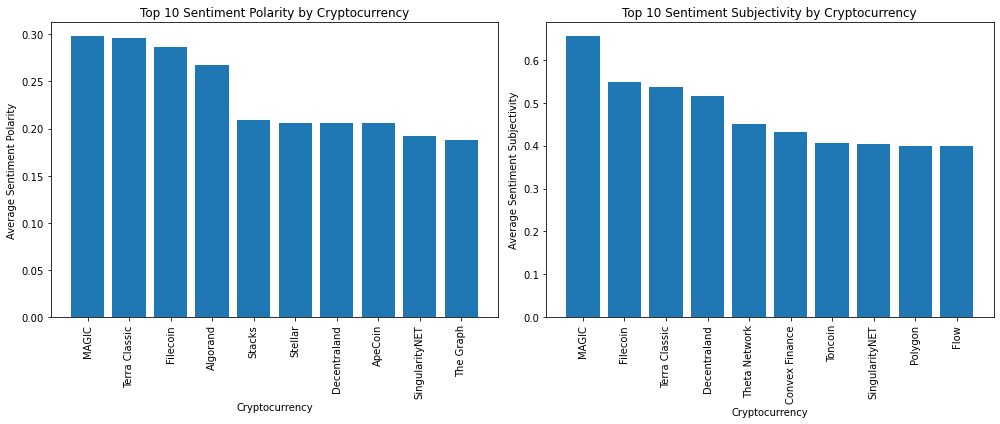

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Sort the sentiment dataframe by average sentiment polarity
sentiment_df_sorted = sentiment_df.sort_values(by='AvgPolarity', ascending=False)
sentiment_df_sorted_pol = sentiment_df_sorted.head(10)

# Create the polarity subplot
ax1.bar(sentiment_df_sorted_pol["Coin"], sentiment_df_sorted_pol["AvgPolarity"])
ax1.set_xlabel('Cryptocurrency')
ax1.set_ylabel('Average Sentiment Polarity')
ax1.set_title('Top 10 Sentiment Polarity by Cryptocurrency')

# Sort the sentiment dataframe by average sentiment subjectivity
sentiment_df_sorted = sentiment_df.sort_values(by='AvgSubjectivity', ascending=False)
sentiment_df_sorted_sub = sentiment_df_sorted.head(10)

# Create the subjectivity subplot
ax2.bar(sentiment_df_sorted_sub["Coin"], sentiment_df_sorted_sub["AvgSubjectivity"])
ax2.set_xlabel('Cryptocurrency')
ax2.set_ylabel('Average Sentiment Subjectivity')
ax2.set_title('Top 10 Sentiment Subjectivity by Cryptocurrency')

# Rotate the x-axis labels
for ax in (ax1, ax2):
    plt.sca(ax)
    plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

## Correlation Analysis

In [35]:
merged_df = pd.merge(sentiment_df, df_combined, on="Coin")

In [36]:
# create DataFrame
df = pd.DataFrame({'Coin': list(degree_centrality.keys()),
                   'Degree_centrality': list(degree_centrality.values()),
                   'Closeness_centrality': list(closeness_centrality.values()),
                   'Betweenness_centrality': list(betweenness_centrality.values())})

merged_df["Coin"] = merged_df["Coin"].str.lower()
merged_df = pd.merge(merged_df, df, on='Coin')
merged_df = merged_df.rename(columns={"Count":"Tweet Count",
                                      "Market Cap Rank":"Market Cap"})

# Create a correlation matrix
corr_matrix = merged_df.corr()
corr_matrix2 = corr_matrix.drop(["Tweet Count Rank"],axis=1)
corr_matrix2["Market Cap"] = abs(corr_matrix2["Market Cap"])
corr_matrix3 = corr_matrix2.drop(corr_matrix2.index[0:5])

In [38]:
corr_matrix3

,AvgPolarity,AvgSubjectivity,Market Cap,Tweet Count,Degree_centrality,Closeness_centrality,Betweenness_centrality
Degree_centrality,0.116064,0.079264,0.541149,0.643645,1.000000,0.798852,0.863244
Closeness_centrality,0.097017,0.067745,0.404797,0.439679,0.798852,1.000000,0.636229
Betweenness_centrality,0.054300,0.022765,0.396381,0.770690,0.863244,0.636229,1.000000


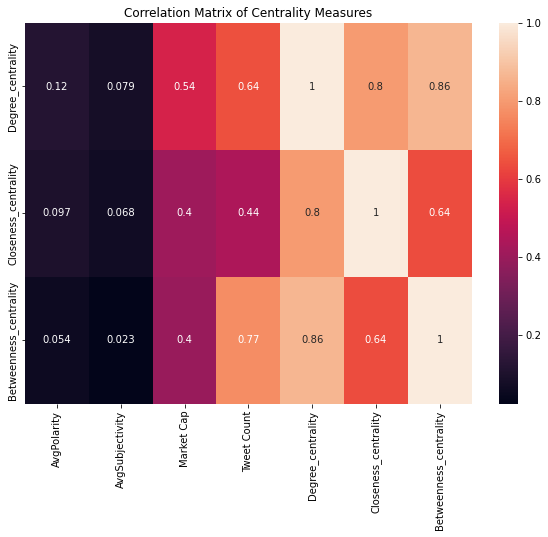

In [39]:
plt.figure(figsize=(10,7))

# Create the heatmap
sns.heatmap(corr_matrix3, annot=True)

# Add a title to the plot
plt.title("Correlation Matrix of Centrality Measures")

# Show the plot
plt.show()